In [70]:
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.dates as mdates

In [72]:
# import the csv to a numpy array
datas = plt.csv2rec("programmingLanguageComparaison.csv")

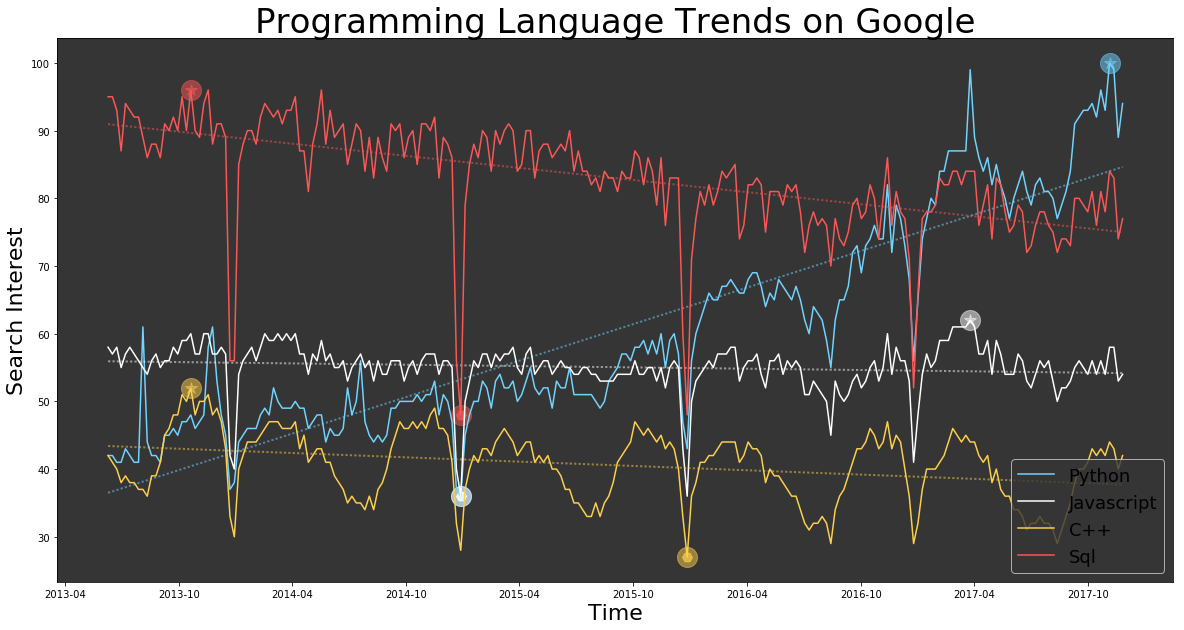

In [275]:
# Set the figure size big to see it clearly
plt.figure(figsize=(20,10))

dates = datas["week"]

# Init the trendsNames for the legend
trendsNames = ["python", "javascript", "C++", "SQL"]

# Init the trends datas to plot them
trendsDatas = [datas["python"], datas["javascript"], datas["c"], 
               datas["sql"]]

# Init the colors
trendsColors = ["#71D4FF", "white", "#FCCF4D", "#FC5757"]
# print(datas["sql"])

# For each trends : [trendName, maxValue, maxValueDate, minValue, minValueDate]
peaks = []

for i in range(len(trendsDatas)):
    # create a temporary list
    tempL = []
    # append the data name to the temp list
    tempL.append(trendsNames[i])
    # append the max value for each data (peak)
    tempL.append(max(trendsDatas[i]))
    # append the max value date (with the maxValue index)
    tempL.append(dates[np.argmax(trendsDatas[i], axis=None)])
    # append the min value for each data (minimum)
    tempL.append(min(trendsDatas[i]))
    # append the min value date (with the minValue index)
    tempL.append(dates[np.argmin(trendsDatas[i], axis=None)])
  
    peaks.append(tempL)

# Create list for the peak value for each language
peaksD = []
peaksDT = []
# Create list for the min value for each language
minD = []
minDT = []
    
for i in range(len(peaks)):
    peaksD.append(peaks[i][1])
    peaksDT.append(peaks[i][2].toordinal())
    minD.append(peaks[i][3])
    minDT.append(peaks[i][4].toordinal())
    
# print(peaksD)

# Add some marker to see the peaks and the minimums values
for i in range(len(peaksD)):
    plt.plot(peaksDT[i], peaksD[i], trendsColors[i], marker='o', markersize=20, alpha=0.5)
    plt.plot(minDT[i], minD[i], trendsColors[i], marker='o', markersize=20, alpha=0.5)
    plt.plot(peaksDT[i], peaksD[i], trendsColors[i], marker='*', markersize=12, alpha=0.5)
    plt.plot(minDT[i], minD[i], trendsColors[i], marker='H', markersize=10, alpha=0.7)
    

# # Iterate over the trends datas and plot them
for i in range(len(trendsDatas)):
    # X= weekstart and Y=trendsData for each trends, labels = trendsNames
    plt.plot(dates, trendsDatas[i], label=trendsNames[i].capitalize(), color=trendsColors[i], linewidth=1.5)
    x = mdates.date2num(dates)
    # Make a linear regression to see where the trend is going
    fit = np.polyfit(x, trendsDatas[i], deg=1)
    plt.plot(x, fit[0] * x + fit[1], trendsColors[i], alpha=0.5, ls=":", linewidth=2)




plt.title("Programming Language Trends on Google", fontsize=34)
plt.legend(loc=4, prop={'size': 18})
plt.xlabel("Time", {'fontsize':22})
plt.ylabel("Search Interest", {'fontsize':22})

plt.rcParams['axes.facecolor']='#353535'
plt.rcParams['savefig.facecolor']='#353535'



plt.show()



In [265]:
for i in peaks:
    output = "*  The peak was " + str(i[1]) + " on " + str(i[2]) + " and the minimum was " + \
    str(i[3]) + " on " + str(i[4])
    special1 = len(output)
    special2 = 72-len(output)
    specialN = special1+special2
    print("*"*(specialN + 2))
    print("*" + " "*(specialN) + "*")
    
    forLang = "*  For " + str(i[0]) + ":"
    
    print(forLang+ " "*(specialN -len(forLang)+1)+"*")
    
    print(output + " "*special2 + " *")
    print("*" + " "*(specialN) + "*")
print("*"*(specialN + 2))

**************************************************************************
*                                                                        *
*  For python:                                                           *
*  The peak was 100 on 2017-11-05 and the minimum was 36 on 2014-12-28   *
*                                                                        *
**************************************************************************
*                                                                        *
*  For javascript:                                                       *
*  The peak was 62 on 2017-03-26 and the minimum was 36 on 2014-12-28    *
*                                                                        *
**************************************************************************
*                                                                        *
*  For C++:                                                              *
*  The peak was 52 on 201